## Examen Interciclo Simulacion

### Nombre: Xavier Jarro

### Introduccion.

El golpe económico de la crisis sanitaria del corona virus no va a ser cosa de semanas, sino de meses. Dentro de una de las etapas importantes que están a la vuelta de la esquina son las elecciones presidenciales y asambleístas del Ecuador. Para ello se plantea realizar un sistema de regresión que permita identificar cual es la tendencia de los votos en base al manejo de las redes sociales (Twitter y/o Facebook).

Las regresiones lineales pueden aprenden por sí mismos y en este caso obtener automáticamente esa “recta” que buscamos con la tendencia de predicción. Para hacerlo se mide el error con respecto a los puntos de entrada y el valor “Y” de salida real.


### Enunciado.
Diseñe y desarrolle un modelo y/o script que permita simular el siguiente caso real:
Obtener datos de tendencia de twitter o facebook, para ello se puede obtener a través del API.
- Title: Titulo del Post/Twitter
- Word count: la cantidad de palabras del artículo,
- Num. of Links: los enlaces externos que contiene,
- Num. of comments: cantidad de comentarios,
- Num. Shares: compartidos.

### Imprortamos las librerias necesarias.

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from facebook_scraper import get_posts
import numpy as np
import seaborn as sb
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

#### Metodo para contar palabras.

In [5]:
def contar(texto):
    cuenta=0
    for carac in texto:        
            cuenta = cuenta + 1
    return cuenta

### Obtencion de informacion a traves de Facebook.

In [13]:
posts = []

for post in get_posts('yakuperezoficial', pages=10):
    post['numWord']=contar(post['text'])
    archi1.close()    
    posts.append(post)
    
for post in get_posts('ecuarauz2021', pages=10):
    post['numWord']=contar(post['text'])    
    posts.append(post)
      

fb_posts = pd.DataFrame(posts)

0     2153
1      469
2      354
3     1084
4     1037
      ... 
71    3113
72    2624
73    3433
74    2746
75    1908
Name: likes, Length: 76, dtype: int64

In [22]:
archi1=open("datos.txt","w") 
for like in fb_posts['likes']:
    archi1.write(str(like)+'\n')
    
archi1.close()

In [23]:
fb_posts.describe()

,likes,comments,shares,numWord
count,76.000000,76.000000,76.000000,76.000000
mean,1825.855263,481.671053,270.802632,217.815789
std,1222.520486,844.798207,548.860396,127.929013
min,200.000000,6.000000,0.000000,0.000000
25%,1183.500000,80.500000,0.000000,130.000000
50%,1531.500000,147.000000,0.000000,228.000000
75%,2209.000000,492.000000,320.500000,283.500000
max,9110.000000,5104.000000,2649.000000,687.000000


In [24]:
fb_posts.head()

,post_id,text,post_text,shared_text,time,image,video,video_thumbnail,video_id,likes,comments,shares,post_url,link,user_id,images,numWord
0,3323645617775175,"Te invito a conocer mi historia, vengo del Ecu...","Te invito a conocer mi historia, vengo del Ecu...",,2020-12-18 17:14:25,None,https://video.fcue3-1.fna.fbcdn.net/v/t42.9040...,https://scontent.fcue3-1.fna.fbcdn.net/v/t15.5...,2862820253993582,2153,183,0,https://facebook.com/watch?v=2862820253993582,None,2069422096530873,[],181
1,416013382875064,⭕️ EN VIVO | La caravana de la honestidad lleg...,⭕️ EN VIVO | La caravana de la honestidad lleg...,,2020-12-20 17:16:18,None,https://video.fcue3-1.fna.fbcdn.net/hvideo-odn...,https://scontent.fcue3-1.fna.fbcdn.net/v/t15.1...,416013382875064,469,383,345,https://facebook.com/watch?v=416013382875064,http://www.yakuperez.com/,2069422096530873,[],231
2,238824137589941,⭕️ EN VIVO | En minka llegamos al Cantón #Durá...,⭕️ EN VIVO | En minka llegamos al Cantón #Durá...,,2020-12-20 16:54:51,None,https://scontent.fcue3-1.fna.fbcdn.net/v/t66.3...,https://scontent.fcue3-1.fna.fbcdn.net/v/t15.5...,238824137589941,354,148,199,https://facebook.com/watch?v=238824137589941,http://www.yakuperez.com/,2069422096530873,[],214
3,3324606037679133,Gracias de todo corazón a toda la gente bella ...,Gracias de todo corazón a toda la gente bella ...,,2020-12-19 23:24:29,https://scontent.fcue3-1.fna.fbcdn.net/v/t1.0-...,None,None,None,1084,50,0,https://facebook.com/story.php?story_fbid=3324...,None,2069422096530873,[https://scontent.fcue3-1.fna.fbcdn.net/v/t1.0...,229
4,3324499161023154,Hemos disfrutado de una tarde con todos nuestr...,Hemos disfrutado de una tarde con todos nuestr...,,2020-12-19 20:17:01,https://scontent.fcue3-1.fna.fbcdn.net/v/t1.0-...,None,None,None,1037,46,0,https://facebook.com/story.php?story_fbid=3324...,None,2069422096530873,[https://scontent.fcue3-1.fna.fbcdn.net/v/t1.0...,340


#### Hacemos una visualización en general de los datos de entrada:

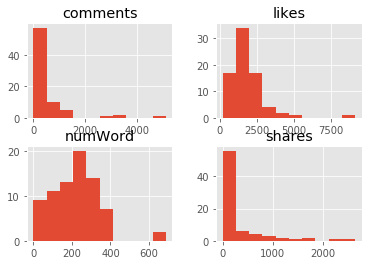

In [25]:
fb_posts.drop(['post_id','post_url', 'time'],1).hist()
plt.show()

### Visualizamos Cantidad de Palabras vs. likes

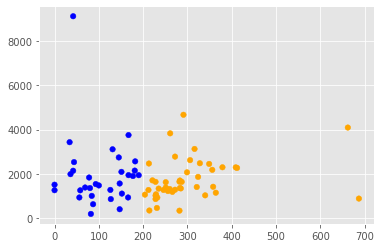

In [29]:
#vamos a Visualizar los datos de entrada
colores=['orange','blue']
tamanios=[30,60]

filtered_data = fb_posts[(fb_posts['numWord'] <= 3500) & (fb_posts['likes'] <= 80000)]

f1 = filtered_data['numWord'].values
f2 = filtered_data['likes'].values

asignar=[]
for index, row in filtered_data.iterrows():
    if(row['numWord']>200):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

### Regresión Lineal Simple.

In [30]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX =filtered_data[["numWord"]]
X_train = np.array(dataX)
y_train = filtered_data['likes'].values
 
# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()
 
# Entrenamos nuestro modelo
regr.fit(X_train, y_train)
 
# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)
 
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [0.20278832]
Independent term: 
 1781.6847649345273
Mean squared error: 1474226.97
Variance score: 0.00


### Visualizamos la Recta que obtuvimos

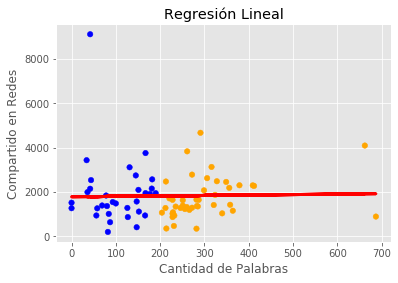

In [31]:
plt.scatter(X_train[:,0], y_train,  c=asignar, s=tamanios[0])
plt.plot(X_train[:,0], y_pred, color='red', linewidth=3)

plt.xlabel('Cantidad de Palabras')
plt.ylabel('Compartido en Redes')
plt.title('Regresión Lineal')

plt.show()

#### Predicción 1

In [32]:
y_Dosmil = regr.predict([[2000]])
print(int(y_Dosmil))

2187


### Regresión Lineal Múltiples (múltiples variables)

In [33]:
suma = (filtered_data["shares"] + filtered_data['comments'].fillna(0))

    
dataX2 =pd.DataFrame()
dataX2["numWord"] = filtered_data["numWord"]
dataX2["suma"] = suma
XY_train = np.array(dataX2)
z_train = filtered_data['likes'].values

In [34]:
# Creamos un nuevo objeto de Regresión Lineal
regr2 = linear_model.LinearRegression()
 
# Entrenamos el modelo, esta vez, con 2 dimensiones
# obtendremos 2 coeficientes, para graficar un plano
regr2.fit(XY_train, z_train)
 
# Hacemos la predicción con la que tendremos puntos sobre el plano hallado
z_pred = regr2.predict(XY_train)
 
# Los coeficientes
print('Coefficients: \n', regr2.coef_)
# Error cuadrático medio
print("Mean squared error: %.2f" % mean_squared_error(z_train, z_pred))
# Evaluamos el puntaje de varianza (siendo 1.0 el mejor posible)
print('Variance score: %.2f' % r2_score(z_train, z_pred))

Coefficients: 
 [1.28208754 0.26385069]
Mean squared error: 1365658.68
Variance score: 0.07


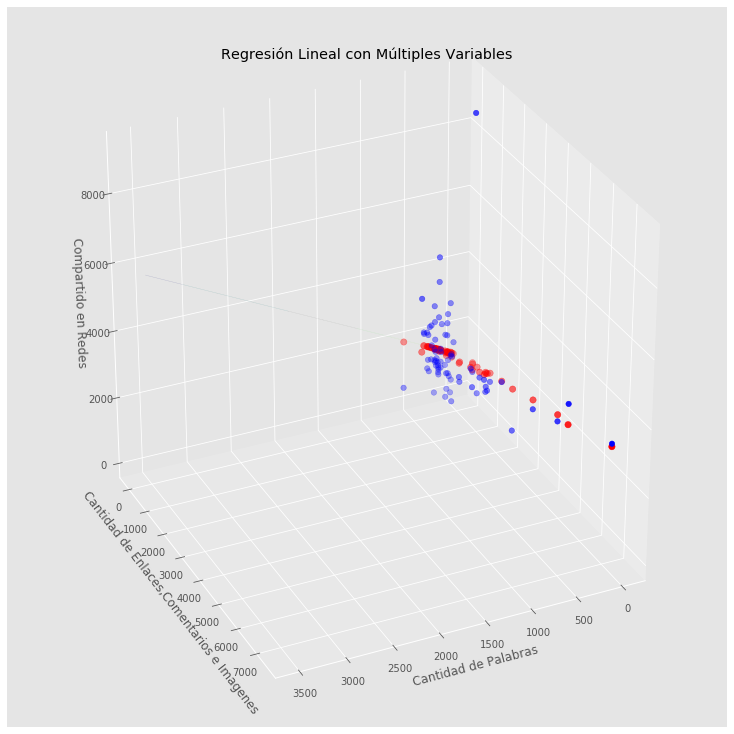

In [35]:
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
 
# Creamos una malla, sobre la cual graficaremos el plano
xx, yy = np.meshgrid(np.linspace(0, 3500, num=10), np.linspace(0, 60, num=10))
 
# calculamos los valores del plano para los puntos x e y
nuevoX = (regr2.coef_[0] * xx)
nuevoY = (regr2.coef_[1] * yy) 
 
# calculamos los correspondientes valores para z. Debemos sumar el punto de intercepción
z = (nuevoX + nuevoY + regr2.intercept_)
 
# Graficamos el plano

ax.plot_surface(xx, yy, z, alpha=0.2, cmap='GnBu',)

 
# Graficamos en azul los puntos en 3D
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_train, c='blue',s=30)
 
# Graficamos en rojo, los puntos que 
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_pred, c='red',s=40)
 
# con esto situamos la "camara" con la que visualizamos
ax.view_init(elev=30., azim=65)
        
ax.set_xlabel('Cantidad de Palabras')
ax.set_ylabel('Cantidad de Enlaces,Comentarios e Imagenes')
ax.set_zlabel('Compartido en Redes')
ax.set_title('Regresión Lineal con Múltiples Variables')
plt.show()

#### Predicción 2

In [36]:
# Si quiero predecir cuántos "Shares" voy a obtener por un artículo con: 
# 2000 palabras y con enlaces: 10, comentarios: 4, imagenes: 6
# según nuestro modelo, hacemos:
 
z_Dosmil = regr2.predict([[2000, 10+4+6]])
print(int(z_Dosmil))

3917


### Simulacion de votos tomando en cuenta el numero de likes de cada candidato.

In [41]:
import random

random.seed(1)
yaku_digits = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
arauz_digits = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
yaku_win_pct = 69.13
arauz_win_pct = 29.28
number_of_sims = 1000
total_wards = 0
total_arauz_votes = 0
total_yaku_votes = 0
total_votes = 0
for i in range(number_of_sims):
    my_input = open('datos.txt')
    for line in my_input:
        total_wards += 1
        fields = line.strip().split()
        num_voters = int(fields[0])
        arauz_votes_in_ward = 0
        yaku_votes_in_ward = 0
        for j in range(num_voters):
            random_num = random.random() * 100
            if random_num <= yaku_win_pct:
                yaku_votes_in_ward += 1
                total_yaku_votes += 1
            elif random_num <= (yaku_win_pct + arauz_win_pct) :
                arauz_votes_in_ward += 1
                total_arauz_votes += 1
            total_votes += 1
        arauz_digit = int(str(arauz_votes_in_ward)[0])
        yaku_digit = int(str(yaku_votes_in_ward)[0])
        arauz_digits[arauz_digit] += 1
        yaku_digits[yaku_digit] += 1
    if i % 100 == 0:
        print('simulacion', i)

arauz_win_pct = 100.0 * total_arauz_votes / total_votes
yaku_win_pct = 100.0 * total_yaku_votes / total_votes
print('yaku porcentaje de ganar:', yaku_win_pct)
print('arauz porcentaje de ganar:', arauz_win_pct)


simulacion 0
simulacion 100
simulacion 200
simulacion 300
simulacion 400
simulacion 500
simulacion 600
simulacion 700
simulacion 800
simulacion 900
yaku porcentaje de ganar: 69.12888120203222
arauz porcentaje de ganar: 29.281659640399237


### Conclusion.

Al poder obtener datos reales de los candidatos podemos realizar una simulacion mas aproximada a la realidad por lo que se puede hacer una pequeña prediccion de quien ganaria la candidatura.

### Referencias:

- https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6291769/
- https://www.aprendemachinelearning.com/regresion-lineal-en-espanol-con-python/
- https://eprints.ucm.es/48804/1/TFM%20Manuel%20Alejandro%20Rodriguez%20Santana.pdf
- http://opac.pucv.cl/pucv_txt/txt-8000/UCC8094_01.pdf
